In [1]:
'''
Author: Ebrar Ömer
Student Id: 150170043
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
import random
from sklearn.model_selection import KFold
df1 = pd.read_csv("train1.csv") 
df2 = pd.read_csv("train2.csv") 
df2m = pd.read_csv("train2_modified.csv") #will be used in Part D

In [2]:
#By printing a dataframe, you can view the data in csv format
print(df1)

           x1        x2    y
0    4.786214  4.650073  1.0
1    3.170196  4.005515  1.0
2    5.000920  4.897350  1.0
3    4.522969  6.215182  0.0
4    3.599857  5.564085  0.0
..        ...       ...  ...
195  3.450067  4.522179  1.0
196  4.621823  6.202977  1.0
197  3.633474  3.684436  1.0
198  3.729999  5.425063  1.0
199  5.104393  6.337585  1.0

[200 rows x 3 columns]


In [3]:
#You can extract keys from dataframe, which you can use to extract features or labels.



df1_x1 = df1['x1']
df1_x2 = df1['x2']

df1_c0 = df1[df1['y']==0]
df1_c1 = df1[df1['y']==1]
df2_c0 = df2[df2['y']==0]
df2_c1 = df2[df2['y']==1]



#To extract data as numpy array:
df1_numpy = df1.values
#You can also extract a specific feature as numpy array as well.
df1_x1_numpy = df2['x1'].values
df2_x1 = df2['x1']
df2_x2 = df2['x2']
df2_numpy = df1.values
df2_x2_numpy = df2['x2'].values


## Part A: Examine training sets

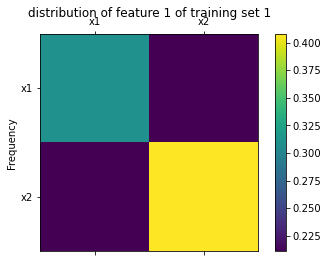

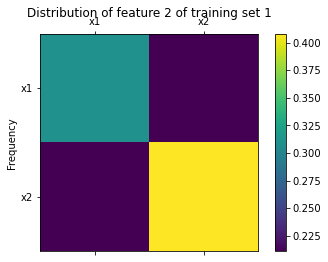

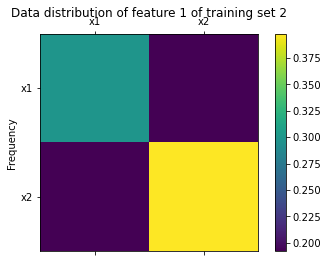

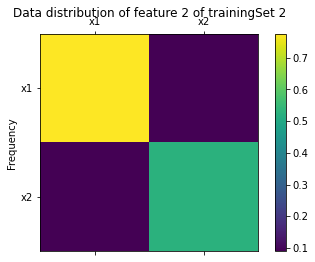

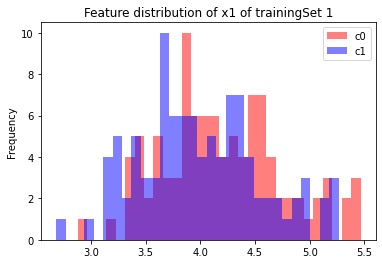

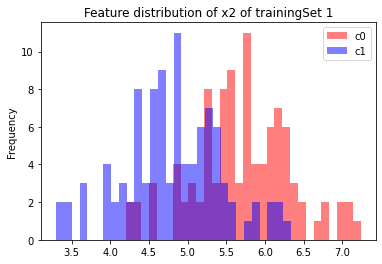

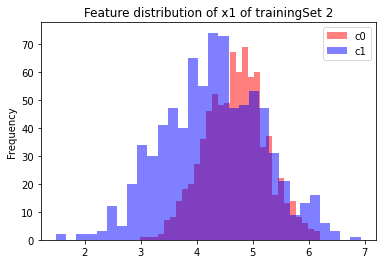

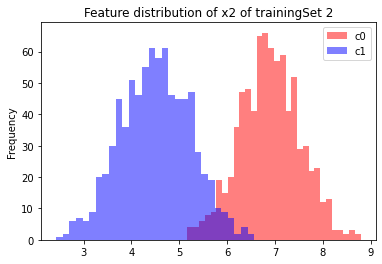

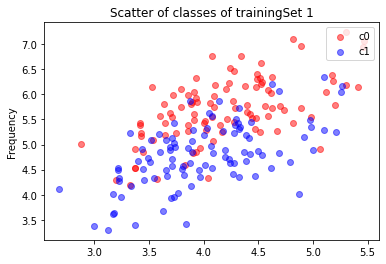

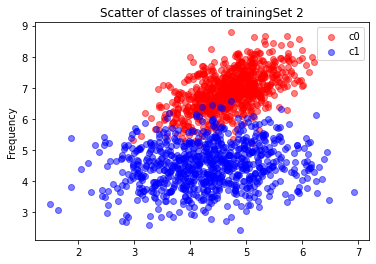

In [4]:
#PART A: Examine training sets here. plots etc.
#Hint: df1_class0 = df1[df1['column_name']==0] creates a new dataframe and includes samples (rows) whose class values are 0
#hint: for data distribution plots use plt.scatter(x-axis,y-axis,other params. check online)
#Hint: for each new plot use plt.figure() so they won't overlap, one on top of another
#-------
#to plot cov. matrices you may use following code: (compute 'cov_mtrx' by yourself)
alpha = ['x1', 'x2']

cov_mtrx  = np.cov(df1_c0.x1,df1_c0.x2)
cov_mtrx2 = np.cov(df1_c1.x1,df1_c1.x2)
cov_mtrx3 = np.cov(df2_c0.x1,df2_c0.x2)
cov_mtrx4 = np.cov(df2_c1.x1,df2_c1.x2)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cov_mtrx,interpolation='nearest') 
plt.gca().set(title='distribution of feature 1 of training set 1', ylabel='Frequency')
fig.colorbar(cax)
ax.set_xticklabels([' ']+alpha)
ax.set_yticklabels([' ']+alpha)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cov_mtrx2,interpolation='nearest') 
plt.gca().set(title='Distribution of feature 2 of training set 1', ylabel='Frequency')
fig.colorbar(cax)
ax.set_xticklabels([' ']+alpha)
ax.set_yticklabels([' ']+alpha)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cov_mtrx3,interpolation='nearest')
plt.gca().set(title='Data distribution of feature 1 of training set 2', ylabel='Frequency')
fig.colorbar(cax)
ax.set_xticklabels([' ']+alpha)
ax.set_yticklabels([' ']+alpha)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cov_mtrx4,interpolation='nearest')
plt.gca().set(title='Data distribution of feature 2 of trainingSet 2', ylabel='Frequency')
fig.colorbar(cax)
ax.set_xticklabels([' ']+alpha)
ax.set_yticklabels([' ']+alpha)

plt.figure()
plt.hist(df1_c0.x1,bins=30,color="red",alpha=0.5,label="c0")
plt.hist(df1_c1.x1,bins=30,color="blue",alpha=0.5,label="c1")
plt.legend(loc="upper right")
plt.gca().set(title='Feature distribution of x1 of trainingSet 1', ylabel='Frequency')

plt.figure()
plt.hist(df1_c0.x2,bins=30,color="red",alpha=0.5,label="c0")
plt.hist(df1_c1.x2,bins=30,color="blue",alpha=0.5,label="c1")
plt.legend(loc="upper right")
plt.gca().set(title='Feature distribution of x2 of trainingSet 1', ylabel='Frequency')

plt.figure()
plt.hist(df2_c0.x1,bins=30,color="red",alpha=0.5,label="c0")
plt.hist(df2_c1.x1,bins=30,color="blue",alpha=0.5,label="c1")
plt.legend(loc="upper right")
plt.gca().set(title='Feature distribution of x1 of trainingSet 2', ylabel='Frequency')

plt.figure()
plt.hist(df2_c0.x2,bins=30,color="red",alpha=0.5,label="c0")
plt.hist(df2_c1.x2,bins=30,color="blue",alpha=0.5,label="c1")
plt.legend(loc="upper right")
plt.gca().set(title='Feature distribution of x2 of trainingSet 2', ylabel='Frequency')



plt.figure()
scatter = plt.scatter(df1_c0.x1, df1_c0.x2,color="red" ,alpha=0.5,label="c0")
scatter = plt.scatter(df1_c1.x1, df1_c1.x2,color="blue",alpha=0.5,label="c1")
plt.gca().set(title='Scatter of classes of trainingSet 1', ylabel='Frequency')

plt.legend(loc="upper right")


plt.figure()
scatter = plt.scatter(df2_c0.x1, df2_c0.x2,color="red" ,alpha=0.5,label="c0")
scatter = plt.scatter(df2_c1.x1, df2_c1.x2,color="blue",alpha=0.5,label="c1")
plt.gca().set(title='Scatter of classes of trainingSet 2', ylabel='Frequency')

plt.legend(loc="upper right")


#---------
#for the histogram plots use plt.hist() (Remember: 4 of them we want)
#for title use: plt.gca().set(title='Data distribution of feature x of trainingSet y', ylabel='Frequency')

We have 2 datasets for train and they have 2 classes. I decide the classes by looking at the y values, this means y is a feature that separates a dataset into two groups by looking if they have this feature or not.

From the first 2 figures, we can say that the first and second covariance matrices are equal. This means class distribution is equal in first dataset.

By looking at the scatters, the second training set has a more uniform distribution over the classes. It can be predicted that we will encounter fewer errors when trained.

In [5]:
#Implement PART B:

def meanvector(data):
    mean_x1 = np.mean(data.x1)
    mean_x2 = np.mean(data.x2)
    return [mean_x1, mean_x2]

mean_class10 = meanvector(df1_c0)
mean_class11 = meanvector(df1_c1)
mean_class20 = meanvector(df2_c0)
mean_class21 = meanvector(df2_c1)

print("Mean vector of class 0 on dataset 1: ",mean_class10)
print("Mean vector of class 1 on dataset 1: ",mean_class11)
print("Mean vector of class 0 on dataset 2: ",mean_class20)
print("Mean vector of class 1 on dataset 2: ",mean_class21)

print("Covariance matrix of class 0 on dataset 1: \n" ,cov_mtrx)
print("Covariance matrix of class 1 on dataset 1: \n", cov_mtrx2)
print("Covariance matrix of class 0 on dataset 2: \n" ,cov_mtrx3)
print("Covariance matrix of class 1 on dataset 2: \n", cov_mtrx4)

testSet1 = pd.read_csv("test1.csv")
testSet2 = pd.read_csv("test2.csv")


prob_df1_c0=len(df1[df1['y']==0])/len(df1)
prob_df1_c1=len(df1[df1['y']==1])/len(df1)

prob_df2_c0=len(df2[df2['y']==0])/len(df2)
prob_df2_c1=len(df2[df2['y']==1])/len(df2)


def calculateerror(testSet, xtwix0, witx0, wi0, xtwix1, witx1, wi1,tp):
    counter = 0
    for i, row in testSet.iterrows():
        x = [[row.x1], [row.x2]]
        if(tp==1):
            first_term0 = np.matmul(np.transpose(x), np.matmul(xtwix0, x))[0][0]
            first_term1 = np.matmul(np.transpose(x),np.matmul(xtwix1, x))[0][0]
            if (first_term0 + np.matmul(witx0, x) + wi0 > first_term1 + np.matmul (witx1, x) + wi1):
                classtype=0
            else:
                classtype=1
            if classtype != row.y:
                counter += 1
        else:
            first_term0 = 0 if xtwix0==0 else np.dot(np.transpose(x), np.dot(xtwix0, x))[0][0]
            first_term1 = 0 if xtwix1==0 else np.dot(np.transpose(x), np.dot(xtwix1, x))[0][0]
            if (first_term0 + np.dot(witx0, x) + wi0 > first_term1 + np.dot (witx1, x) + wi1):
                classtype=0
            else:
                classtype=1
            if classtype != row.y:
                counter += 1
            
    return counter / len(testSet) * 100

def bayes(trset,mean0, mean1, cov0, cov1, p0, p1):
    ln_p0 = math.log(p0)
    ln_p1 = math.log(p1)
    trmean0=np.transpose(mean0)
    trmean1=np.transpose(mean1)
    invcov0=np.linalg.inv(cov0)
    invcov1=np.linalg.inv(cov1)
    det0=np.linalg.det(cov0)
    det1=np.linalg.det(cov1)
    ln_det0 = math.log(det0)
    ln_det1 = math.log(det1)
    
    xtwix0 = xtwix1 = 0 
    # if covariance matrices are equal, we dont need this variable
    wi0 = ln_p0 -(np.dot(mean0,np.dot(invcov0, trmean0))) /2
    witx0 = np.dot(mean0, invcov0)
    witx1 = np.dot(mean1,invcov1)
    wi1 = ln_p1 -(np.dot(mean1,np.dot(invcov1, trmean1))) /2
    
    #If covariance matrices are equal discriminant function is gi(x)=witx + wi0
    #"If covariance matrices are not equal discriminant function is gi(x)= xtwix + witx + wi0 "
    
    if (cov0==cov1).any():# covariance matrices are equal
        return calculateerror(trset, xtwix0, witx0, wi0, xtwix1, witx1, wi1,0)

    else: #general case
        wi0= wi0-ln_det0/2
        wi1= wi1-ln_det1/2
        xtwix0 = -(np.matmul([[1/2, 0], [0, 1/2]], invcov0))
        xtwix1 = -(np.matmul([[1/2, 0], [0, 1/2]], invcov1))
        print(trset, xtwix0, witx0, wi0, xtwix1, witx1, wi1)
        return calculateerror(trset, xtwix0, witx0, wi0, xtwix1, witx1, wi1,1)


error1= bayes(testSet1, mean_class10,mean_class11,cov_mtrx, cov_mtrx2,prob_df1_c0,prob_df1_c1)
error2= bayes(testSet2, mean_class20,mean_class21,cov_mtrx3, cov_mtrx4,prob_df2_c0,prob_df2_c1)
print("Test Set 1 Error: ",error1)
print("Test Set 2 Error: ",error2 )



Mean vector of class 0 on dataset 1:  [4.2, 5.700000000000001]
Mean vector of class 1 on dataset 1:  [4.0, 4.8]
Mean vector of class 0 on dataset 2:  [4.691560237609959, 6.889336398633411]
Mean vector of class 1 on dataset 2:  [4.297250287831394, 4.504441214534947]
Covariance matrix of class 0 on dataset 1: 
 [[0.31090407 0.2108642 ]
 [0.2108642  0.40802121]]
Covariance matrix of class 1 on dataset 1: 
 [[0.31090407 0.2108642 ]
 [0.2108642  0.40802121]]
Covariance matrix of class 0 on dataset 2: 
 [[0.29951128 0.19207738]
 [0.19207738 0.39774578]]
Covariance matrix of class 1 on dataset 2: 
 [[0.77538057 0.0893196 ]
 [0.0893196  0.52802646]]
           x1        x2    y
0    4.418160  5.223632  1.0
1    4.509276  5.495003  0.0
2    5.131102  4.692929  1.0
3    4.159342  7.058550  0.0
4    3.872938  5.929577  0.0
..        ...       ...  ...
395  2.919332  4.784195  1.0
396  5.252280  7.237716  0.0
397  3.698371  3.761957  1.0
398  4.228699  8.790368  0.0
399  4.035976  5.872765  0.0

[

My prediction has become true. The second dataset has fewer errors than the first dataset because of its distribution.

In [6]:
#Implement PART C:
d1 = pd.concat([df1, testSet1])
d2 = pd.concat([df2, testSet2])


kf = KFold(n_splits=3) 

kf.get_n_splits(d1)
KFold(n_splits=3, random_state=1773, shuffle=True) 


error1 = 0
for train_index, test_index in kf.split(d1):
    test_count = int(len(d1) / 3)
    train_count = int(len(d1) - test_count)
    
    train_begin = train_index[0]
    test_begin = test_index[0]
    
    dtr1 = d1.iloc[train_begin:train_begin+train_count]
    dts1 = d1.iloc[test_begin:test_begin+test_count]
    
    dtr1_c0 = dtr1[dtr1['y']==0]
    dtr1_c1 = dtr1[dtr1['y']==1]
    
    cov_mtrx_dtr1_c0 = np.cov(dtr1_c0.x1 , dtr1_c0.x2)
    cov_mtrx_dtr1_c1 = np.cov(dtr1_c1.x1 , dtr1_c1.x2)
    
    mean_dtr1_c0 = meanvector(dtr1_c0)
    mean_dtr1_c1 = meanvector(dtr1_c1)
    
    prob_dtr1_c0 = len(dtr1[dtr1['y']==0]) / len(dtr1)
    prob_dtr1_c1 = len(dtr1[dtr1['y']==1]) / len(dtr1)
    
    
    error_dtr1 = bayes(dts1,mean_dtr1_c0, mean_dtr1_c1, cov_mtrx_dtr1_c0,cov_mtrx_dtr1_c1,prob_dtr1_c0, prob_dtr1_c0)
    error1 += error_dtr1
    
averageError1= error1/ 3
print("3-fold average error on dataset 1: ", averageError1)

kf.get_n_splits(d2)
KFold(n_splits=3, random_state=None, shuffle=False)

error2 = 0
for train_index, test_index in kf.split(d2):
    test_count = int(len(d2) / 5)
    train_count = int(len(d2) - test_count)
    
    train_begin = train_index[0]
    test_begin = test_index[0]
    
    dtr2 = d2.iloc[train_begin:train_begin+train_count]
    dts2 = d2.iloc[test_begin:test_begin+test_count]
    
    dtr2_c0 = dtr2[dtr2['y']==0]
    dtr2_c1 = dtr2[dtr2['y']==1]
    
    cov_mtrx_dtr2_c0 = np.cov(dtr2_c0.x1,dtr2_c0.x2)
    cov_mtrx_dtr2_c1 = np.cov(dtr2_c1.x1,dtr2_c1.x2)
    
    mean_dtr2_c0 = meanvector(dtr2_c0)
    mean_dtr2_c1 = meanvector(dtr2_c1)
    
    prob_dtr2_c0 = len(dtr2[dtr2['y']==0]) / len(dtr2)
    prob_dtr2_c1 = len(dtr2[dtr2['y']==1]) / len(dtr2)
    
    error_dtr2 = bayes(dtr2, mean_dtr2_c0,mean_dtr2_c1, cov_mtrx_dtr2_c0,cov_mtrx_dtr2_c1,prob_dtr2_c0,prob_dtr2_c0)
    
    error2 += error_dtr2
    
averageError2 = error2/ 3
print("3-fold average error on dataset2: ", averageError2)




          x1        x2    y
0   4.786214  4.650073  1.0
1   3.170196  4.005515  1.0
2   5.000920  4.897350  1.0
3   4.522969  6.215182  0.0
4   3.599857  5.564085  0.0
..       ...       ...  ...
95  3.376824  4.526800  0.0
96  3.370196  4.905515  0.0
97  4.042826  4.323858  0.0
98  4.291927  5.506495  1.0
99  3.712779  5.140386  1.0

[100 rows x 3 columns] [[-2.7434817   1.52915724]
 [ 1.52915724 -2.05411329]] [ 5.63231805 10.57430627] -41.366931090626196 [[-3.34977075  1.82394606]
 [ 1.82394606 -2.18730469]] [9.23720921 6.43750401] -33.15478834982136
3-fold average error on dataset 1:  20.333333333333332
           x1        x2    y
667  5.243536  4.852344  1.0
668  4.595860  6.083006  0.0
669  5.409553  8.140104  0.0
670  4.952242  4.866033  1.0
671  3.659357  4.847644  1.0
..        ...       ...  ...
395  2.919332  4.784195  1.0
396  5.252280  7.237716  0.0
397  3.698371  3.761957  1.0
398  4.228699  8.790368  0.0
399  4.035976  5.872765  0.0

[1333 rows x 3 columns] [[-2.3698272 

When I train with 3-fold cross-validation, I have observed that the results are close to part B but more fractional. The close results gave me confidence that my calculation was correct. Since 3-fold trades multiple times, I think their answers are more acceptable.


            x1        x2    y
0     3.810828  6.928757  1.0
1     4.376219  6.141752  0.0
2     5.092311  6.931234  0.0
3     4.358281  7.324346  0.0
4     5.379770  7.549258  1.0
...        ...       ...  ...
1635  5.213251  3.372431  1.0
1636  3.754436  4.845878  1.0
1637  4.963434  5.053129  1.0
1638  4.804976  6.182205  0.0
1639  2.954989  4.156481  1.0

[1640 rows x 3 columns] [[-2.28664843  0.93998086]
 [ 0.93998086 -1.28935711]] [8.54447453 8.81883325] -49.719977917664266 [[-0.66962686  0.12051299]
 [ 0.12051299 -0.77315328]] [4.67139051 6.01898204] -24.144981265366972
Test Set 2-Modified Error:  5.670731707317073


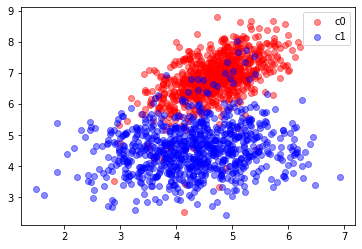

In [7]:
#Implement Part D:
df2m_c0 = df2m[df2m['y']==0]
df2m_c1 = df2m[df2m['y']==1]

plt.figure()
scatter = plt.scatter(df2m_c0.x1, df2m_c0.x2, color="red",alpha=0.45,  label="c0")
scatter = plt.scatter(df2m_c1.x1, df2m_c1.x2,  color="blue",alpha=0.45, label="c1")
leg = plt.legend(loc='upper right')

cov_mtrx_df2m_c0 = np.cov(df2m_c0.x1,df2m_c0.x2)
cov_mtrx_df2m_c1 = np.cov(df2m_c1.x1,df2m_c1.x2)

mean_df2m_c0 = meanvector(df2m_c0)
mean_df2m_c1 = meanvector(df2m_c1)


prob_df2m_c0 = len(df2m[df2m['y']==0]) / len(df2m)
prob_df2m_c1 = len(df2m[df2m['y']==1]) / len(df2m)

error_modified = bayes(df2m,mean_df2m_c0, mean_df2m_c1,cov_mtrx_df2m_c0,cov_mtrx_df2m_c1,prob_df2m_c0, prob_df2m_c1)

print("Test Set 2-Modified Error: ", error_modified)

If we examine the scatter we have drawn for Modified dataset 2, we come across with outliers. There is no such uniform distribution as we got in Part B. We see points belonging to different classes are overlapping. Therefore, we were waiting for our error value to increase and it increased. Bayes classifier is a reliable statistics algorithm.